# Movie sentimental Analysis using NLP

Dataset:https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
    

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import pickle
import seaborn as sns

In [2]:
df = pd.read_csv("IMDB Dataset.csv")

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.shape

(50000, 2)

In [5]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [6]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [8]:
df['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [9]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

C:\Users\user\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

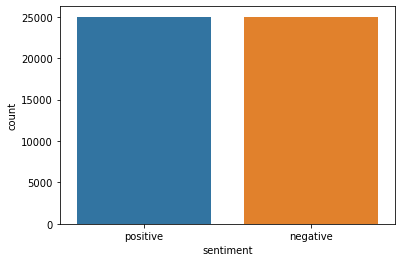

In [10]:
sns.countplot(df['sentiment'])

In [11]:
label = LabelEncoder()
df['sentiment'] = label.fit_transform(df['sentiment'])
label

LabelEncoder()

In [12]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [13]:
x = df['review']
y = df['sentiment']

# Remove all special and numerical character from data and also remove stopwords and apply stemming

In [14]:
ps = PorterStemmer()
corpus = []
for i in range(len(x)/2):
    review = re.sub("[^a-zA-Z]"," " ,x[i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in set(stopwords.words("english"))]
    review =" ".join(review)
    corpus.append(review)

TypeError: 'float' object cannot be interpreted as an integer

In [ ]:
from sklearn.feature_extraction.text import TfidVectorizer
cv =TfidVectorizer(max_features =5000)
X = cv.fit_transform(corpus).toarray()

In [ ]:
X.shape

# Split data into train and test

In [ ]:
X_train,X_test.Y_train,Y_test =train_test_split(X,y,test_size = 0.2,random_state = 101)

In [ ]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

# Define naive_bayes model

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train,Y_train)

# Testing 

In [ ]:
pred =mnb.predict(x_test)


# check Accuracy_score,Confusion_Matric and classsification_report

In [ ]:
print(accuracy_score(Y_test,pred))
print(accuracy_matrix(Y_test,pred))
print(classification_report(Y_test,pred))



# Difference between actual and predicted data

In [ ]:
pd.DataFrame(np.c_[Y_test,pred],columns=["Actual","Predicted"])

In [ ]:
pickle.dump(cv,open("count_Vectorizer.pkl" , "wb"))#1:pos 0:neg
pickle.dumb(mnb,open("Movies_Reviews_Classification.pkl","wb"))

# Load my naive_bayes model and TfidVectorizer

In [ ]:
save_cv = pickle.load(open('count_vectorizer.pkl','rb'))
model =pickle.load(open('movies_Review_Classification.pkl','rb'))

# Define my function to test the model

In [ ]:
def test_model(sentence):
    sen = save_cv.transform([sentence]).toarray()
    res = model.predict(sen)[0]
    if res == 1:
        return 'Positive review'
    else:
        return 'Negative Review'

# Test first positive review and check that what does model predict and it predicted correct

In [ ]:
sen ='This is the wonderful movie of my life'
res = test_model(sen)
print(res)

# test second negative review and check the prediction

In [ ]:
sen = 'This is the worst movie,i have ever seen in my life'
res = test_model(sen)
print(res)